In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
path_model = '/content/gdrive/MyDrive/INF 0619-010 - Trabalho Final - Zanoni/Modelos'
#path_model = '/content/gdrive/MyDrive/619_Projeto Final'

### Leitura dos arquivos de endereços com CEPs e sua subdivisões.

In [ ]:
#Arquivos csv de endereços
path_end = '/content/gdrive/MyDrive/TrabalhoFinal_CleanDataset/enderecos'
#path_end = '/content/gdrive/MyDrive/619_Projeto Final'
df_endEmpr = pd.read_csv(os.path.join(path_end, 'end_empresas_in.csv'))
df_endNEmpr = pd.read_csv(os.path.join(path_end, 'end_nao_empresas_in.csv'))

In [ ]:
df_endEmpr.dtypes

Indice                int64
Tipo_Logradouro      object
Nome_Logradouro      object
Numero_Logradouro    object
CEP                   int64
Municipio            object
endereco_completo    object
Label                object
cep_regiao            int64
cep_subregiao         int64
cep_setor             int64
cep_subsetor          int64
cep_divsub            int64
cep_ident             int64
dtype: object

In [ ]:
df_endNEmpr.dtypes

Indice                int64
Tipo_Logradouro      object
Nome_Logradouro      object
Numero_Logradouro     int64
CEP                   int64
Municipio            object
endereco_completo    object
Label                object
cep_regiao            int64
cep_subregiao         int64
cep_setor             int64
cep_subsetor          int64
cep_divsub            int64
cep_ident             int64
dtype: object

### Leitura das imagens. A divisão dos endereços em treino, validação e teste seguirá a divisão das imagens.

In [ ]:
#Imagens
src_path1 = '/content/gdrive/MyDrive/TrabalhoFinal_CleanDataset'
train_path = os.path.join(src_path1, 'train_v2')
train_path_emp = os.path.join(train_path, 'empresas')
train_path_Nemp = os.path.join(train_path, 'nao_empresas')

#src_path = '/content/gdrive/MyDrive/619_ProjetoFinal/Dados_ProjetoFinal/split_train_val_test'
src_path = '/content/gdrive/MyDrive/Dados_ProjetoFinal_MDC010-INF019/split_train_val_test'
val_path = os.path.join(src_path, 'val')
test_path = os.path.join(src_path, 'test')

val_path_emp = os.path.join(val_path, 'imagens_empresas')
val_path_Nemp = os.path.join(val_path, 'imagens_nao_empresas')

test_path_emp = os.path.join(test_path, 'imagens_empresas')
test_path_Nemp = os.path.join(test_path, 'imagens_nao_empresas')

In [ ]:
#Listagem dos arquivos de imagens
train_arrImagEmp = os.listdir(train_path_emp)
train_arrImagNEmp = os.listdir(train_path_Nemp)
val_arrImagEmp = os.listdir(val_path_emp)
val_arrImagNEmp = os.listdir(val_path_Nemp)
test_arrImagEmp = os.listdir(test_path_emp)
test_arrImagNEmp = os.listdir(test_path_Nemp)

In [ ]:
#Indicação da imagem como treinamento
train_ind_imagensEmp = []
for i in train_arrImagEmp:
  ind = [int(i.strip('.jpg')),"train"]
  train_ind_imagensEmp.append(ind)

df_train_imagEmp = pd.DataFrame (train_ind_imagensEmp, columns = ['Indice','div'])

train_ind_imagensNEmp = []
for i in train_arrImagNEmp:
  ind = [int(i.strip('.jpg')),"train"]
  train_ind_imagensNEmp.append(ind)

df_train_imagNEmp = pd.DataFrame (train_ind_imagensNEmp, columns = ['Indice','div'])
df_train_imagNEmp.dtypes

Indice     int64
div       object
dtype: object

In [ ]:
#Indicação da imagem como validação
val_ind_imagensEmp = []
for i in val_arrImagEmp:
  ind = [int(i.strip('.jpg')),"val"]
  val_ind_imagensEmp.append(ind)

df_val_imagEmp = pd.DataFrame (val_ind_imagensEmp, columns = ['Indice','div'])

val_ind_imagensNEmp = []
for i in val_arrImagNEmp:
  ind = [int(i.strip('.jpg')),"val"]
  val_ind_imagensNEmp.append(ind)

df_val_imagNEmp = pd.DataFrame (val_ind_imagensNEmp, columns = ['Indice','div'])
df_val_imagNEmp.dtypes

Indice     int64
div       object
dtype: object

In [ ]:
#Indicação da imagem como teste
test_ind_imagensEmp = []
for i in test_arrImagEmp:
  ind = [int(i.strip('.jpg')),"test"]
  test_ind_imagensEmp.append(ind)

df_test_imagEmp = pd.DataFrame (test_ind_imagensEmp, columns = ['Indice','div'])

test_ind_imagensNEmp = []
for i in test_arrImagNEmp:
  ind = [int(i.strip('.jpg')),"test"]
  test_ind_imagensNEmp.append(ind)

df_test_imagNEmp = pd.DataFrame (test_ind_imagensNEmp, columns = ['Indice','div'])
df_test_imagNEmp.dtypes

Indice     int64
div       object
dtype: object

### Preprocessamento dos dados de endereço.

In [ ]:
df_Emp = pd.concat([df_train_imagEmp, df_val_imagEmp, df_test_imagEmp])
df_NEmp = pd.concat([df_train_imagNEmp, df_val_imagNEmp, df_test_imagNEmp])
df_cons_Emp = pd.merge(df_endEmpr, df_Emp, how = 'outer', on = 'Indice')
df_cons_NEmp = pd.merge(df_endNEmpr, df_NEmp, how = 'outer', on = 'Indice')
df_cons = pd.concat([df_cons_Emp, df_cons_NEmp])
df_cons = df_cons.applymap(lambda s:s.upper() if type(s) == str else s)

In [ ]:
df_cons

,Indice,Tipo_Logradouro,Nome_Logradouro,Numero_Logradouro,CEP,Municipio,endereco_completo,Label,cep_regiao,cep_subregiao,cep_setor,cep_subsetor,cep_divsub,cep_ident,div
0,0,AVENIDA,FREI ORESTES GIRARDI,2477,12460000,CAMPOS DO JORDAO,"AVENIDA FREI ORESTES GIRARDI, 2477, CAMPOS DO ...",EMPRESA,1,2,4,6,0,0,NaN
1,1,AVENIDA,DO RIO BONITO,1431,4776002,SAO PAULO,"AVENIDA DO RIO BONITO, 1431, SAO PAULO",EMPRESA,0,4,7,7,6,2,NaN
2,2,RUA,PADRE ROQUE,199,13800033,MOGI MIRIM,"RUA PADRE ROQUE, 199, MOGI MIRIM",EMPRESA,1,3,8,0,0,33,NaN
3,3,RUA,DR. AMERICO FIGUEIREDO,108,18055131,SOROCABA,"RUA DR. AMERICO FIGUEIREDO, 108, SOROCABA",EMPRESA,1,8,0,5,5,131,NaN
4,4,RUA,VISCONDE DE INHAUMA,1600A,14025100,RIBEIRAO PRETO,"RUA VISCONDE DE INHAUMA, 1600A, RIBEIRAO PRETO",EMPRESA,1,4,0,2,5,100,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8722,8722,RUA,RUA MARC CHAGALL,397,5036170,SAO PAULO,"RUA RUA MARC CHAGALL, 397, SAO PAULO",N_EMPRESA,0,5,0,3,6,170,TRAIN
8723,8723,AVENIDA,AVENIDA ENGENHEIRO EUSEBIO STEVAUX,2461,4696000,SAO PAULO,"AVENIDA AVENIDA ENGENHEIRO EUSEBIO STEVAUX, 24...",N_EMPRESA,0,4,6,9,6,0,TRAIN
8724,8724,RUA,RUA BELA CINTRA,2286,1415000,SAO PAULO,"RUA RUA BELA CINTRA, 2286, SAO PAULO",N_EMPRESA,0,1,4,1,5,0,TEST
8725,8725,ALAMEDA,ALAMEDA BARAO DE LIMEIRA,45,1202000,SAO PAULO,"ALAMEDA ALAMEDA BARAO DE LIMEIRA, 45, SAO PAULO",N_EMPRESA,0,1,2,0,2,0,NaN


In [ ]:
#Transformação do em dummies.
lograd_dummies = pd.get_dummies(df_cons.Tipo_Logradouro)
df_cons = pd.concat([df_cons, lograd_dummies], axis=1)

In [ ]:
#Seleção dos endereços para treinamento conforme ids das imagens
df_train = df_cons.loc[(df_cons['div'] == 'TRAIN') & (df_cons['Nome_Logradouro'].notnull())]
df_train

,Indice,Tipo_Logradouro,Nome_Logradouro,Numero_Logradouro,CEP,Municipio,endereco_completo,Label,cep_regiao,cep_subregiao,cep_setor,cep_subsetor,cep_divsub,cep_ident,div,-,10A RUA,11A AVENIDA,11A RUA,1A AVENIDA,1A RUA,ACESSO,ALAMEDA,ANEL VIARIO,AREA,AVENIDA,AVENIDA MARGINAL,CALCADA,CAMINHO,CHACARA,ENTRADA,ESTANCIA,ESTRADA,ESTRADA ESTADUAL,ESTRADA MUNICIPAL,ESTRADA PARTICULAR,ESTRADA VELHA,ESTRADA VICINAL,FAZENDA,ILHA,JARDIM,LADEIRA,LARGO,LOTEAMENTO,NUCLEO,NUCLEO RURAL,PARQUE,PASSAGEM,PASSEIO,PRACA,PRAÃ§A,RESIDENCIAL,RODOVIA,RUA,RUA DE PEDESTRE,RUA PRINCIPAL,SERVIDAO,SITIO,TRAVESSA,TRECHO,VARIANTE,VIA,VIA DE ACESSO,VIADUTO,VIELA,VILA
1000,1000,RUA,DR. JOSE ELIAS,172,5083030,SAO PAULO,"RUA DR. JOSE ELIAS, 172, SAO PAULO",EMPRESA,0,5,0,8,3,30,TRAIN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1001,1001,AVENIDA,GONCALVES,570,14781335,BARRETOS,"AVENIDA GONCALVES, 570, BARRETOS",EMPRESA,1,4,7,8,1,335,TRAIN,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1002,1002,AVENIDA,DA LUZ,1630,15092150,SAO JOSE DO RIO PRETO,"AVENIDA DA LUZ, 1630, SAO JOSE DO RIO PRETO",EMPRESA,1,5,0,9,2,150,TRAIN,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1013,1013,AVENIDA,AMERICO BELAY,3144,87025841,MARINGA,"AVENIDA AMERICO BELAY, 3144, MARINGA",EMPRESA,8,7,0,2,5,841,TRAIN,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1014,1014,RUA,PROFESSOR LOURENCO CARNEIRO,68,19806200,ASSIS,"RUA PROFESSOR LOURENCO CARNEIRO, 68, ASSIS",EMPRESA,1,9,8,0,6,200,TRAIN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8719,8719,RUA,RUA CORONEL FERREIRA LEAL,98,5589090,SAO PAULO,"RUA RUA CORONEL FERREIRA LEAL, 98, SAO PAULO",N_EMPRESA,0,5,5,8,9,90,TRAIN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
8721,8721,RUA,RUA NOSSA SENHORA DO BOM CONSELHO,320,5763470,SAO PAULO,"RUA RUA NOSSA SENHORA DO BOM CONSELHO, 320, S...",N_EMPRESA,0,5,7,6,3,470,TRAIN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
8722,8722,RUA,RUA MARC CHAGALL,397,5036170,SAO PAULO,"RUA RUA MARC CHAGALL, 397, SAO PAULO",N_EMPRESA,0,5,0,3,6,170,TRAIN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
8723,8723,AVENIDA,AVENIDA ENGENHEIRO EUSEBIO STEVAUX,2461,4696000,SAO PAULO,"AVENIDA AVENIDA ENGENHEIRO EUSEBIO STEVAUX, 24...",N_EMPRESA,0,4,6,9,6,0,TRAIN,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Seleção dos endereços para validação conforme ids das imagens
df_val = df_cons.loc[(df_cons['div'] == 'VAL') & (df_cons['Nome_Logradouro'].notnull())]
df_val

,Indice,Tipo_Logradouro,Nome_Logradouro,Numero_Logradouro,CEP,Municipio,endereco_completo,Label,cep_regiao,cep_subregiao,cep_setor,cep_subsetor,cep_divsub,cep_ident,div,-,10A RUA,11A AVENIDA,11A RUA,1A AVENIDA,1A RUA,ACESSO,ALAMEDA,ANEL VIARIO,AREA,AVENIDA,AVENIDA MARGINAL,CALCADA,CAMINHO,CHACARA,ENTRADA,ESTANCIA,ESTRADA,ESTRADA ESTADUAL,ESTRADA MUNICIPAL,ESTRADA PARTICULAR,ESTRADA VELHA,ESTRADA VICINAL,FAZENDA,ILHA,JARDIM,LADEIRA,LARGO,LOTEAMENTO,NUCLEO,NUCLEO RURAL,PARQUE,PASSAGEM,PASSEIO,PRACA,PRAÃ§A,RESIDENCIAL,RODOVIA,RUA,RUA DE PEDESTRE,RUA PRINCIPAL,SERVIDAO,SITIO,TRAVESSA,TRECHO,VARIANTE,VIA,VIA DE ACESSO,VIADUTO,VIELA,VILA
1019,1019,AVENIDA,DOS ESTADOS,8000,9270270,SANTO ANDRE,"AVENIDA DOS ESTADOS, 8000, SANTO ANDRE",EMPRESA,0,9,2,7,0,270,VAL,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1020,1020,RODOVIA,RAPOSO TAVARES,1040,18131220,SAO ROQUE,"RODOVIA RAPOSO TAVARES, 1040, SAO ROQUE",EMPRESA,1,8,1,3,1,220,VAL,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1041,1041,RUA,RUA NICOLAU MAURO,975,13520000,SAO PEDRO,"RUA RUA NICOLAU MAURO, 975, SAO PEDRO",EMPRESA,1,3,5,2,0,0,VAL,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1051,1051,RUA,DULCE FERREIRA S. QUATROCHI,194,7400015,ARUJA,"RUA DULCE FERREIRA S. QUATROCHI, 194, ARUJA",EMPRESA,0,7,4,0,0,15,VAL,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1055,1055,RUA,PORTUGAL,417,6033020,OSASCO,"RUA PORTUGAL, 417, OSASCO",EMPRESA,0,6,0,3,3,20,VAL,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,8688,RUA,RUA SOCRATES,341,4671070,SAO PAULO,"RUA RUA SOCRATES, 341, SAO PAULO",N_EMPRESA,0,4,6,7,1,70,VAL,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
8691,8691,RUA,RUA PAIM,307,1306010,SAO PAULO,"RUA RUA PAIM, 307, SAO PAULO",N_EMPRESA,0,1,3,0,6,10,VAL,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
8696,8696,RUA,RUA COSTA,41,1304010,SAO PAULO,"RUA RUA COSTA, 41, SAO PAULO",N_EMPRESA,0,1,3,0,4,10,VAL,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
8698,8698,RUA,RUA BELMONTE,360,5088050,SAO PAULO,"RUA RUA BELMONTE, 360, SAO PAULO",N_EMPRESA,0,5,0,8,8,50,VAL,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Seleção dos endereços para teste conforme ids das imagens
df_test = df_cons.loc[(df_cons['div'] == 'TEST') & (df_cons['Nome_Logradouro'].notnull())]
df_test

,Indice,Tipo_Logradouro,Nome_Logradouro,Numero_Logradouro,CEP,Municipio,endereco_completo,Label,cep_regiao,cep_subregiao,cep_setor,cep_subsetor,cep_divsub,cep_ident,div,-,10A RUA,11A AVENIDA,11A RUA,1A AVENIDA,1A RUA,ACESSO,ALAMEDA,ANEL VIARIO,AREA,AVENIDA,AVENIDA MARGINAL,CALCADA,CAMINHO,CHACARA,ENTRADA,ESTANCIA,ESTRADA,ESTRADA ESTADUAL,ESTRADA MUNICIPAL,ESTRADA PARTICULAR,ESTRADA VELHA,ESTRADA VICINAL,FAZENDA,ILHA,JARDIM,LADEIRA,LARGO,LOTEAMENTO,NUCLEO,NUCLEO RURAL,PARQUE,PASSAGEM,PASSEIO,PRACA,PRAÃ§A,RESIDENCIAL,RODOVIA,RUA,RUA DE PEDESTRE,RUA PRINCIPAL,SERVIDAO,SITIO,TRAVESSA,TRECHO,VARIANTE,VIA,VIA DE ACESSO,VIADUTO,VIELA,VILA
1003,1003,AVENIDA,JULIO PRESTES DE ALBUQUERQUE,473,11717110,PRAIA GRANDE,"AVENIDA JULIO PRESTES DE ALBUQUERQUE, 473, PRA...",EMPRESA,1,1,7,1,7,110,TEST,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1012,1012,AVENIDA,FERNAO DIAS PAES LEME,2211,13220005,VARZEA PAULISTA,"AVENIDA FERNAO DIAS PAES LEME, 2211, VARZEA PA...",EMPRESA,1,3,2,2,0,5,TEST,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1022,1022,AVENIDA,FERNANDES DA CUNHA,633,40445200,SALVADOR,"AVENIDA FERNANDES DA CUNHA, 633, SALVADOR",EMPRESA,4,0,4,4,5,200,TEST,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1028,1028,AVENIDA,PAPA JOAO PAULO I,6967,7174005,GUARULHOS,"AVENIDA PAPA JOAO PAULO I, 6967, GUARULHOS",EMPRESA,0,7,1,7,4,5,TEST,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1040,1040,AVENIDA,DOUTOR JOSE BONIFACIO COUTINHO NOGUEIRA,150,13091611,CAMPINAS,AVENIDA DOUTOR JOSE BONIFACIO COUTINHO NOGUEIR...,EMPRESA,1,3,0,9,1,611,TEST,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8683,8683,RUA,RUA SANTO ALEXANDRE,22,3542100,SAO PAULO,"RUA RUA SANTO ALEXANDRE, 22, SAO PAULO",N_EMPRESA,0,3,5,4,2,100,TEST,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
8692,8692,RUA,RUA PADRE JOAO GUALBERTO,581,2537000,SAO PAULO,"RUA RUA PADRE JOAO GUALBERTO, 581, SAO PAULO",N_EMPRESA,0,2,5,3,7,0,TEST,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
8699,8699,RUA,RUA ARMINDO GUARANA,152,3335070,SAO PAULO,"RUA RUA ARMINDO GUARANA, 152, SAO PAULO",N_EMPRESA,0,3,3,3,5,70,TEST,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
8713,8713,RUA,RUA MAJOR FREIRE,594,4304110,SAO PAULO,"RUA RUA MAJOR FREIRE, 594, SAO PAULO",N_EMPRESA,0,4,3,0,4,110,TEST,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_train.isnull().values.any()

False

In [ ]:
df_val.isnull().values.any()

False

In [ ]:
df_test.isnull().values.any()

False

### Primeira seleção de features.

In [ ]:
l_features=list(lograd_dummies)
l_features.append('CEP')
l_features.append('cep_regiao')
l_features.append('cep_subregiao')
l_features.append('cep_setor')
l_features.append('cep_subsetor')
l_features.append('cep_divsub')
l_features.append('cep_ident')
print('Número de features: ', len(l_features))

Número de features:  58


### Separação dos conjuntos de dados para entrada nos modelos.

In [ ]:
df_cons_train = pd.concat([df_train, df_val])
X_c = df_cons_train[l_features]
y_c = df_cons_train['Label']

In [ ]:
X = df_train[l_features]
y = df_train['Label']

In [ ]:
X_val = df_val[l_features]
y_val = df_val['Label']

In [ ]:
X_test = df_test[l_features]
y_test = df_test['Label']

## Modelo Random Forest Balanceado

In [ ]:
# random forest balanceado
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.model_selection import cross_validate
from numpy import mean

model1 = BalancedRandomForestClassifier()

In [ ]:
# evaluation
cross_val = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
resultados = cross_validate(model1, X, y, scoring=['roc_auc', 'balanced_accuracy'], cv=cross_val, n_jobs=-1)
print('AUC ROC Médio: %.3f' % mean(resultados['test_roc_auc']))
print('Acurácia Balanceada Média: %.3f' % mean(resultados['test_balanced_accuracy']))

AUC ROC Médio: 0.934
Acurácia Balanceada Média: 0.870


### GridSearch dos parâmetros.

In [ ]:
from sklearn.model_selection import GridSearchCV
parametros = { 
    'n_estimators': [10, 100, 200, 500],
    'max_depth' : [8, 16, 32],
}
model_grid = GridSearchCV(estimator=model1, param_grid=parametros, cv= 5)

In [ ]:
model_grid.fit(X, y)
model_grid.best_params_

{'max_depth': 16, 'n_estimators': 500}

In [ ]:
modelRF=BalancedRandomForestClassifier(random_state=42, n_estimators= 200, max_depth=16)

In [ ]:
# evaluation
cross_val = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
resultados = cross_validate(modelRF, X, y, scoring=['roc_auc', 'balanced_accuracy'], cv=cross_val, n_jobs=-1)
print('AUC ROC Médio: %.3f' % mean(resultados['test_roc_auc']))
print('Acurácia Balanceada Média: %.3f' % mean(resultados['test_balanced_accuracy']))

AUC ROC Médio: 0.935
Acurácia Balanceada Média: 0.876


In [ ]:
classifierRF = modelRF.fit(X, y)

### Verificação de importância das features.

In [ ]:
from sklearn.inspection import permutation_importance
result = permutation_importance(modelRF, X, y, n_repeats=10, random_state=42, n_jobs=-1)

In [ ]:
forest_importances = pd.Series(result.importances_mean, index=l_features).sort_values(ascending=False)

In [ ]:
forest_importances[0:20]

CEP                  0.180254
cep_regiao           0.097247
cep_subregiao        0.069088
cep_ident            0.064362
cep_setor            0.044631
cep_subsetor         0.038376
cep_divsub           0.034246
RUA                  0.020664
AVENIDA              0.017207
PRACA                0.000933
ALAMEDA              0.000581
ESTRADA              0.000168
PRAÃ§A               0.000107
TRAVESSA             0.000076
RODOVIA              0.000015
LARGO                0.000015
ESTANCIA             0.000000
ESTRADA MUNICIPAL    0.000000
ENTRADA              0.000000
CHACARA              0.000000
dtype: float64

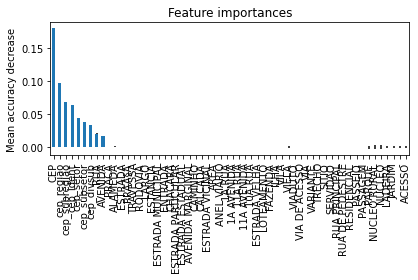

In [ ]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

### Seleção das features mais importantes.

In [ ]:
l_features_reduz=['AVENIDA', 'RUA', 'CEP', 'cep_regiao', 'cep_subregiao', 'cep_setor', 'cep_subsetor', 'cep_divsub', 'cep_ident']

In [ ]:
X_reduz = df_train[l_features_reduz]
X_val_reduz = df_val[l_features_reduz]
X_test_reduz = df_test[l_features_reduz]

In [ ]:
# evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_validate(modelRF, X_reduz, y, scoring=['roc_auc', 'balanced_accuracy'], cv=cv, n_jobs=-1)
# performance
print('AUC ROC Médio: %.3f' % mean(scores['test_roc_auc']))
print('Acurácia Balanceada Média: %.3f' % mean(scores['test_balanced_accuracy']))

AUC ROC Médio: 0.935
Acurácia Balanceada Média: 0.878


###Treinamento e gravação do modelo final

In [ ]:
classifierRF_reduz = modelRF.fit(X_reduz, y)

In [ ]:
import pickle
filename = os.path.join(path_model, 'model_RandomForest.sav')
pickle.dump(modelRF, open(filename, 'wb'))

### Predições com probabilidades.

In [ ]:
predictionsRF = classifierRF_reduz.predict_proba(X_reduz)
print(predictionsRF)

[[0.36240755 0.63759245]
 [0.995      0.005     ]
 [1.         0.        ]
 ...
 [0.06244964 0.93755036]
 [0.04528357 0.95471643]
 [0.0375     0.9625    ]]


In [ ]:
dataset = pd.DataFrame()
dataset['y'] = y
dataset['predRF_cEmp'] = predictionsRF[:,0]
dataset['predRF_cNEmp'] = predictionsRF[:,1]
dataset.head()

,y,predRF_cEmp,predRF_cNEmp
1000,EMPRESA,0.362408,0.637592
1001,EMPRESA,0.995000,0.005000
1002,EMPRESA,1.000000,0.000000
1013,EMPRESA,1.000000,0.000000
1014,EMPRESA,1.000000,0.000000


In [ ]:
predictionsRF_val = classifierRF_reduz.predict_proba(X_val_reduz)
print(predictionsRF_val)

[[0.995      0.005     ]
 [1.         0.        ]
 [1.         0.        ]
 ...
 [0.24398843 0.75601157]
 [0.19461659 0.80538341]
 [0.31469529 0.68530471]]


In [ ]:
dataset_val = pd.DataFrame()
dataset_val['y'] = y_val
dataset_val['predRF_cEmp'] = predictionsRF_val[:,0]
dataset_val['predRF_cNEmp'] = predictionsRF_val[:,1]
dataset_val.head()

,y,predRF_cEmp,predRF_cNEmp
1019,EMPRESA,0.995,0.005
1020,EMPRESA,1.000,0.000
1041,EMPRESA,1.000,0.000
1051,EMPRESA,0.995,0.005
1055,EMPRESA,0.995,0.005


In [ ]:
predictionsRF_test = classifierRF_reduz.predict_proba(X_test_reduz)
print(predictionsRF_test)

[[1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 ...
 [0.0717536  0.9282464 ]
 [0.03808302 0.96191698]
 [0.03155768 0.96844232]]


In [ ]:
dataset_test = pd.DataFrame()
dataset_test['y'] = y_test
dataset_test['predRF_cEmp'] = predictionsRF_test[:,0]
dataset_test['predRF_cNEmp'] = predictionsRF_test[:,1]
dataset_test.head()

,y,predRF_cEmp,predRF_cNEmp
1003,EMPRESA,1.0,0.0
1012,EMPRESA,1.0,0.0
1022,EMPRESA,1.0,0.0
1028,EMPRESA,1.0,0.0
1040,EMPRESA,1.0,0.0


In [ ]:
dataset.to_csv(os.path.join(path_end, 'predicoes_treino0.csv'))
dataset_val.to_csv(os.path.join(path_end, 'predicoes_validacao0.csv'))
dataset_test.to_csv(os.path.join(path_end, 'predicoes_teste0.csv'))

### Matriz de confusão.

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, balanced_accuracy_score

# Avaliando conjunto de validação
y_val_pred = modelRF.predict(X_val_reduz)
# Acurácia balanceada & Matriz de confusão relativa
balanced_accuracy_score_val = balanced_accuracy_score(y_val, y_val_pred)
cm = confusion_matrix(y_true=y_val, y_pred=y_val_pred, normalize='true') # a matriz de confusão é normalizada sobre as condições verdadeiras (linhas)

Random Forrest | Balanced Acc: 0.8912


Text(0.5, 57.5, 'Predicted label')

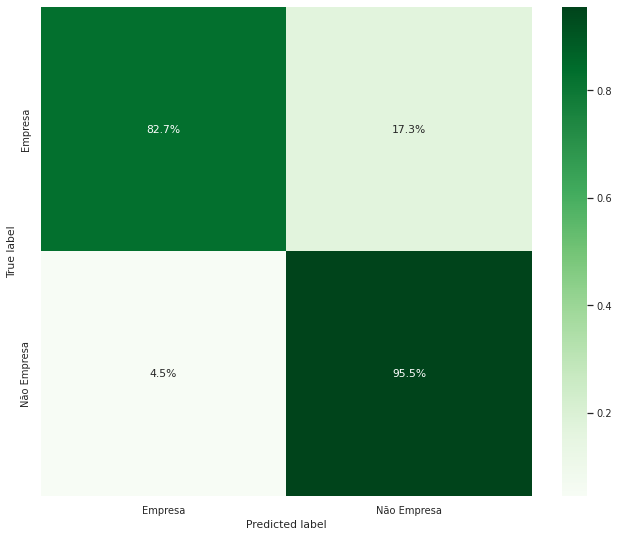

In [ ]:
import seaborn as sns
categories = ['Empresa', 'Não Empresa']
title = f"Random Forrest | Balanced Acc: {round(balanced_accuracy_score_val,4)}"
print(title)
plt.figure(figsize = (11,9))
sns.set(font_scale=0.9)
sns.heatmap(cm, annot=True, fmt='.1%', xticklabels=categories, yticklabels=categories, cmap='Greens')
plt.ylabel('True label')
plt.xlabel('Predicted label')

### Curva ROC.

In [ ]:
y_val_int = (y_val == 'N_EMPRESA').astype(np.int32)  

In [ ]:
#AUC-ROC
from sklearn.metrics import roc_curve
fpr, tpr, thresh = roc_curve(y_val_int, predictionsRF_val[:,1], pos_label=1)

from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score(y_val_int, predictionsRF_val[:,1])
print(auc_score)

0.9438147145465902


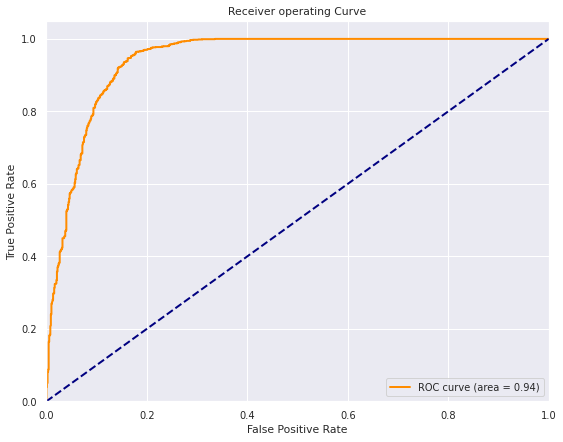

In [ ]:
plt.figure(figsize = (9,7))
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % auc_score,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating Curve")
plt.legend(loc="lower right")
plt.show()

## Modelo XGBoost

In [ ]:
from xgboost import XGBClassifier
# fit model no training data
modelXGB = XGBClassifier()
classifierXGB = modelXGB.fit(X, y)

In [ ]:
import pickle
filename = os.path.join(path_model, 'model_XGBoost.sav')
pickle.dump(modelXGB, open(filename, 'wb'))

In [ ]:
# evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_validate(modelXGB, X, y, scoring=['roc_auc', 'balanced_accuracy'], cv=cv, n_jobs=-1)
# performance
print('AUC ROC Médio: %.3f' % mean(scores['test_roc_auc']))
print('Acurácia Balanceada Média: %.3f' % mean(scores['test_balanced_accuracy']))

AUC ROC Médio: 0.922
Acurácia Balanceada Média: 0.871


### Predições com probabilidades.

In [ ]:
predictionsXGB = classifierXGB.predict_proba(X)
print(predictionsXGB)

[[1.3294941e-01 8.6705059e-01]
 [9.9873757e-01 1.2624104e-03]
 [9.9913764e-01 8.6237316e-04]
 ...
 [1.5185016e-01 8.4814984e-01]
 [1.7463279e-01 8.2536721e-01]
 [2.2151244e-01 7.7848756e-01]]


In [ ]:
dataset['predXGB_cEmp'] = predictionsXGB[:,0]
dataset['predXGB_cNEmp'] = predictionsXGB[:,1]
dataset.head()

,y,predRF_cEmp,predRF_cNEmp,predXGB_cEmp,predXGB_cNEmp
1000,EMPRESA,0.362408,0.637592,0.132949,0.867051
1001,EMPRESA,0.995000,0.005000,0.998738,0.001262
1002,EMPRESA,1.000000,0.000000,0.999138,0.000862
1013,EMPRESA,1.000000,0.000000,0.999046,0.000954
1014,EMPRESA,1.000000,0.000000,0.997948,0.002052


In [ ]:
predictionsXGB_val = classifierXGB.predict_proba(X_val)
print(predictionsXGB_val)

[[0.998109   0.00189102]
 [0.99847645 0.00152357]
 [0.99896127 0.00103874]
 ...
 [0.14712363 0.85287637]
 [0.11699933 0.8830007 ]
 [0.17678005 0.82321995]]


In [ ]:
dataset_val['predXGB_cEmp'] = predictionsXGB_val[:,0]
dataset_val['predXGB_cNEmp'] = predictionsXGB_val[:,1]
dataset_val.head()

,y,predRF_cEmp,predRF_cNEmp,predXGB_cEmp,predXGB_cNEmp
1019,EMPRESA,0.995,0.005,0.998109,0.001891
1020,EMPRESA,1.000,0.000,0.998476,0.001524
1041,EMPRESA,1.000,0.000,0.998961,0.001039
1051,EMPRESA,0.995,0.005,0.973973,0.026027
1055,EMPRESA,0.995,0.005,0.947540,0.052460


In [ ]:
predictionsXGB_test = classifierXGB.predict_proba(X_test)
print(predictionsXGB_test)

[[9.9925870e-01 7.4129889e-04]
 [9.9964410e-01 3.5592602e-04]
 [9.9900055e-01 9.9945068e-04]
 ...
 [1.2657404e-01 8.7342596e-01]
 [1.2121695e-01 8.7878305e-01]
 [1.2183958e-01 8.7816042e-01]]


In [ ]:
dataset_test['predXGB_cEmp'] = predictionsXGB_test[:,0]
dataset_test['predXGB_cNEmp'] = predictionsXGB_test[:,1]
dataset_test.head()

,y,predRF_cEmp,predRF_cNEmp,predXGB_cEmp,predXGB_cNEmp
1003,EMPRESA,1.0,0.0,0.999259,0.000741
1012,EMPRESA,1.0,0.0,0.999644,0.000356
1022,EMPRESA,1.0,0.0,0.999001,0.000999
1028,EMPRESA,1.0,0.0,0.995357,0.004643
1040,EMPRESA,1.0,0.0,0.998386,0.001614


In [ ]:
dataset.to_csv(os.path.join(path_end, 'predicoes_treino0.csv'))
dataset_val.to_csv(os.path.join(path_end, 'predicoes_validacao0.csv'))
dataset_test.to_csv(os.path.join(path_end, 'predicoes_teste0.csv'))

### Matriz de confusão.

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, balanced_accuracy_score

# Avaliando conjunto de validação
y_val_pred = modelXGB.predict(X_val)
# Acurácia balanceada & Matriz de confusão relativa
balanced_accuracy_score_val = balanced_accuracy_score(y_val, y_val_pred)
cm = confusion_matrix(y_true=y_val, y_pred=y_val_pred, normalize='true') # a matriz de confusão é normalizada sobre as condições verdadeiras (linhas)

XGBoost | Balanced Acc: 0.8816


Text(0.5, 57.5, 'Predicted label')

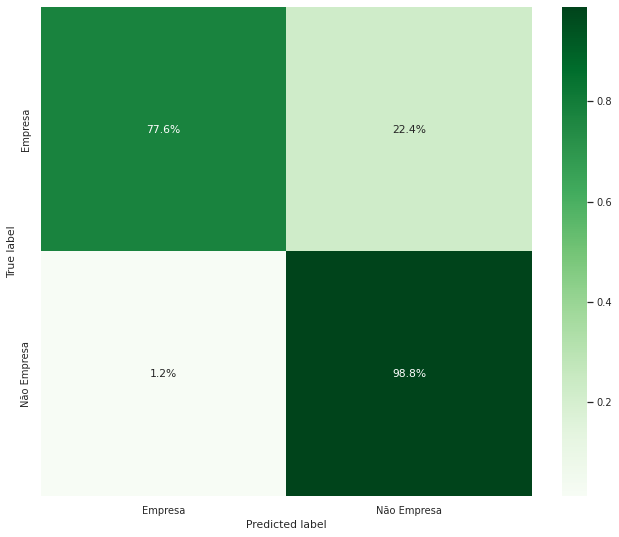

In [ ]:
import seaborn as sns
categories = ['Empresa', 'Não Empresa']
title = f"XGBoost | Balanced Acc: {round(balanced_accuracy_score_val,4)}"
print(title)
plt.figure(figsize = (11,9))
sns.set(font_scale=0.9)
sns.heatmap(cm, annot=True, fmt='.1%', xticklabels=categories, yticklabels=categories, cmap='Greens')
plt.ylabel('True label')
plt.xlabel('Predicted label')

### Curva ROC.

In [ ]:
y_val_int = (y_val == 'N_EMPRESA').astype(np.int32)  

In [ ]:
#AUC-ROC
from sklearn.metrics import roc_curve
fpr, tpr, thresh = roc_curve(y_val_int, predictionsXGB_val[:,1], pos_label=1)

from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score(y_val_int, predictionsXGB_val[:,1])
print(auc_score)

0.9303505098767042


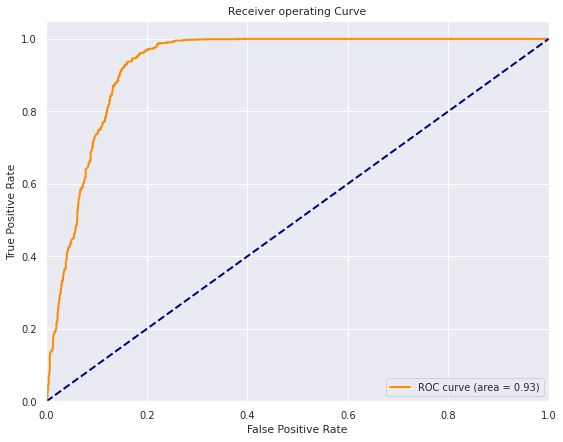

In [ ]:
plt.figure(figsize = (9,7))
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % auc_score,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating Curve")
plt.legend(loc="lower right")
plt.show()